# Monte Carlo Simulation
-----------------------------


## Brief description

Uncertainty is a crucial aspect of several real-world problems. In some cases, we have a good understanding of uncertain events (e.g., we know the probability distribution). In some cases, though, the assessment of uncertainty is slightly more complex; this happens when the real-world element we want to model is affected by several uncertain aspects.

We will see an example of how uncertainty affects the problem we solved using the brute-force method.



# Recall the problem description - Furniture (extracted from the textbook)

**Problem Description:**
Veerman Furniture Company makes three kinds of ofﬁce furniture: chairs, desks, and tables. Each product requires some labor in the parts fabrication department, the assembly department, and the shipping department. The furniture is sold through a regional distributor, who has estimated the maximum potential sales for each product in the coming quarter. Finally,the accounting department has provided some data showing the proﬁt contributions on each product. The decision problem is to determine the product mix — that is, to **maximize Veerman’s proﬁt for the quarter by choosing production quantities for chairs, desks, and tables**.

The following data summarizes the parameters of the problem:

Department | Chairs | Desks | Tables | Hours Available
--- | --- | --- | --- | ---
Fabrication | 4 | 6 | 2 | 1,850
Assembly | 3 | 5 | 7 | 2,400
Shipping | 3 | 2 | 4 | 1,500
--------------------------------------------------------------------------------
Demand Potential | 360 | 300 | 100 |
Profit (USD) | 15 | 24 | 18 |

# Brute-force algorithm

Let's recall the brute-force code to solve the problem.

In [ ]:
# list
# https://en.wikipedia.org/wiki/Array_data_structure
products = ["chair","desk","table"]

# dictionary
# https://en.wikipedia.org/wiki/Hash_table

fabrication = {
    "chair" : 4,
    "desk" : 6,
    "table" : 2
}
assembly = {
    "chair" : 3,
    "desk" : 5,
    "table" : 7
}
shipping = {
    "chair" : 3,
    "desk" : 2,
    "table" : 4
}
demand = {
    "chair" : 360,
    "desk" : 300,
    "table" : 100
}
profit = {
    "chair" : 15,
    "desk" : 24,
    "table" : 18
}
hours = {
    "fabrication" : 1850,
    "assembly" : 2400,
    "shipping" : 1500
}

In [ ]:
# Variables containing current best value and current best solution
best_profit = 0
best_n_chairs = 0
best_n_desks = 0
best_n_tables = 0
for chairs in range(0,demand["chair"]+1):
  for desks in range(0,demand["desk"]+1):
    for tables in range(0,demand["table"]+1):
       # Check required fabrication hours
        if fabrication["chair"]*chairs + fabrication["desk"]*desks + fabrication["table"]*tables > hours["fabrication"]:
          continue
        # Check required assembly hours
        if assembly["chair"]*chairs + assembly["desk"]*desks + assembly["table"]*tables > hours["assembly"]:
          continue
        # Check required shipping hours
        if shipping["chair"]*chairs + shipping["desk"]*desks + shipping["table"]*tables > hours["shipping"]:
          continue
        if profit["chair"]*chairs + profit["desk"]*desks + profit["table"]*tables > best_profit:
          best_profit = profit["chair"]*chairs + profit["desk"]*desks + profit["table"]*tables
          best_n_chairs = chairs
          best_n_desks = desks
          best_n_tables = tables

print("Maximum profit:",best_profit)
print("Chairs",best_n_chairs)
print("Desks",best_n_desks)
print("Tables",best_n_tables)

Maximum profit: 8400
Chairs 0
Desks 275
Tables 100


## Optimal solution

In the optimal solution for the problem, we have:


*   0 Chairs
*   275 Desks
*   100 Tables




# Demand Uncertainty

In the original problem, we made the very strong assumption that the demand is known (deterministic). In many real-world settings, though, demand may be unknown. Consequently, the quality of the solution we found for the deterministic version of the problem is also uncertain.

Let's see what happens **if we assume that demand may be wrong by 10%, assuming uniform error**. **Numpy** will be a strong ally now.


In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## What is the expected profit of the optimal solution we found for the deterministic case?

If the demand is larger than or equal to our production levels, the profit will not change. Otherwise, if the demand goes below our production levels, we will lose some money.

Mean profit: 8350.714178170114


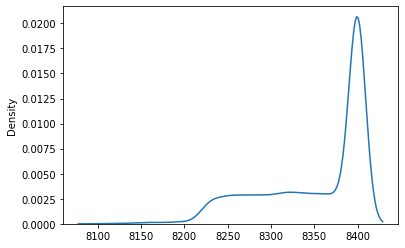

In [ ]:
# List of results
results1 = list()

# Errors
error = 0.1
low_range = 1 - error
high_range = 1 + error

n_simulations = 10000

for k in range(n_simulations):
  simulated_demand_chairs = demand['chair']*np.random.uniform(low=low_range,high=high_range)
  simulated_demand_desks = demand['desk']*np.random.uniform(low=low_range,high=high_range)
  simulated_demand_tables = demand['table']*np.random.uniform(low=low_range,high=high_range)

  sold_chairs = 0
  if sold_chairs > simulated_demand_chairs:
    sold_chairs = simulated_demand_chairs

  sold_desks = 275
  if sold_desks > simulated_demand_desks:
    sold_desks = simulated_demand_desks

  sold_tables = 100
  if sold_tables > simulated_demand_tables:
    sold_tables = simulated_demand_tables

  simulated_profit = profit['chair']*sold_chairs + profit['desk']*sold_desks + profit['table']*sold_tables

  if simulated_profit > 8400:
    print(sold_chairs,sold_desks,sold_tables)

  results1.append(simulated_profit)

print("Mean profit:",np.mean(results1))
sns.kdeplot(results1)
plt.show()

Observe that the mean profit is strictly smaller than the profit we got in the deterministic case. Convince yourself that **no simulation will give a profit that is higher than 8400**.

# Uncertainty in the number of available hours

Similarly to demand, the number of available hours in each machine may be uncertain in practice (e.g., the deterministic values may be only estimates). This aspect is slightly more critical, as our solutions may be infeasible if we lose some precious hours. Let's consider the scenarios where the number of available hours may also vary uniformly by 10%.


## What is the probability with which the optimal solution for the deterministic case is feasible?

In [ ]:
# Errors
error = 0.1
low_range = 1 - error
high_range = 1 + error

n_simulations = 10000

n_infeasible = 0.0

chairs = 0
desks = 275
tables = 100

fab_inf = 0
asb_inf = 0
shp_inf = 0

for k in range(n_simulations):
  fab_hours = hours['fabrication']*np.random.uniform(low=low_range,high=high_range)
  asb_hours = hours['assembly']*np.random.uniform(low=low_range,high=high_range)
  shp_hours = hours['shipping']*np.random.uniform(low=low_range,high=high_range)

  is_feasible = True

  # Check required fabrication hours
  if fabrication["chair"]*chairs + fabrication["desk"]*desks + fabrication["table"]*tables > fab_hours:
    fab_inf += 1
    is_feasible = False

  # Check required assembly hours
  if assembly["chair"]*chairs + assembly["desk"]*desks + assembly["table"]*tables > asb_hours:
    asb_inf += 1
    is_feasible = False

  # Check required shipping hours
  if shipping["chair"]*chairs + shipping["desk"]*desks + shipping["table"]*tables > shp_hours:
    shp_inf += 1
    is_feasible = False

  if False == is_feasible:
    n_infeasible += 1.0

print("Infeasibility probability:",n_infeasible/n_simulations)
print("Infeasibility fabrication:",fab_inf/n_simulations)
print("Infeasibility assembly:",asb_inf/n_simulations)
print("Infeasibility shipping:",shp_inf/n_simulations)

Ineasibility probability: 0.51
Infeasibility fabrication: 0.51
Infeasibility assembly: 0.0
Infeasibility shipping: 0.0


# Exercise: Rolling the Dice

Suppose that you have 2 6-sided dice, with faces numbered from 1 to 6. Both dice are fair, i.e., after rolling them, each face will appear with probability $\frac{1}{6}$. Use the Monte Carlo Method to determine the probability with which rolling two dice will give you values $x$ and $y$ such that $x + y = 7$. You will probably need to use **np.random.randint(low=1,high=6)**


In [4]:
import numpy as np
n_ok = 0

n_simulations = 10000

for k in range(n_simulations):
  x = np.random.randint(low=1,high=6)
  y = np.random.randint(low=1,high=6)

  if x + y == 7:
    n_ok += 1

print(n_ok/n_simulations)

0.158


In [2]:
1/6


0.16666666666666666